<a href="https://colab.research.google.com/github/Otabek-Rizayev/AI-Models/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images')]

In [2]:
!ls /root/.fastai/data/camvid_tiny/images

0001TP_006750.png  0006R0_f02490.png  0016E5_05940.png	0016E5_08125.png    Seq05VD_f01830.png
0001TP_006840.png  0006R0_f02550.png  0016E5_06090.png	0016E5_08137.png    Seq05VD_f01890.png
0001TP_007500.png  0006R0_f02610.png  0016E5_06240.png	0016E5_08141.png    Seq05VD_f01950.png
0001TP_007860.png  0006R0_f02910.png  0016E5_06300.png	0016E5_08155.png    Seq05VD_f02070.png
0001TP_008070.png  0006R0_f03180.png  0016E5_06570.png	0016E5_08280.png    Seq05VD_f02370.png
0001TP_008160.png  0006R0_f03210.png  0016E5_06810.png	0016E5_08340.png    Seq05VD_f02640.png
0001TP_008400.png  0006R0_f03240.png  0016E5_06870.png	0016E5_08370.png    Seq05VD_f02880.png
0001TP_008580.png  0006R0_f03330.png  0016E5_06990.png	0016E5_08400.png    Seq05VD_f02940.png
0001TP_008670.png  0006R0_f03450.png  0016E5_07290.png	0016E5_08550.png    Seq05VD_f03060.png
0001TP_008700.png  0006R0_f03630.png  0016E5_07973.png	Seq05VD_f00000.png  Seq05VD_f03090.png
0001TP_008760.png  0006R0_f03720.png  0016E5_07979.png	Seq05

In [8]:
def label_getter(file):
    return path/'labels'/f'{file.stem}_P{file.suffix}'

# DataLoaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func=label_getter,
                                              codes=np.loadtxt(path/'codes.txt', dtype=str))

# Fine tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

epoch,train_loss,valid_loss,time
0,2.986554,3.013593,01:19


epoch,train_loss,valid_loss,time
0,2.152744,1.851012,01:27
1,1.815653,1.370491,01:24
2,1.612772,1.376541,01:27
3,1.527220,1.202125,01:25
4,1.395450,0.855408,01:26
5,1.313998,0.904310,01:25
6,1.215305,0.831476,01:26
7,1.118636,0.721922,01:25
8,1.025681,0.710735,01:26
9,0.945371,0.671327,01:24


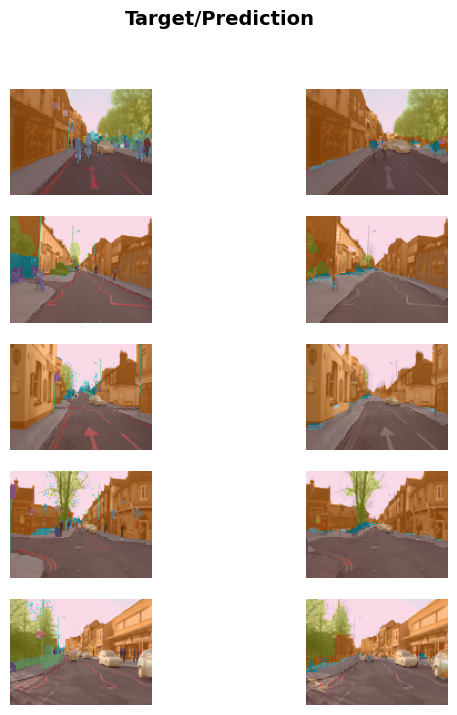

In [9]:
learn.show_results(max_n=5, figsize=(7,8))